In [184]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# from google.colab import drive
# drive.mount('/content/drive')

In [186]:
csv_path = '/content/drive/My Drive/AI_Resume_Screening.csv'
data = pd.read_csv(csv_path)

In [187]:
data.head()

,Resume_ID,Name,Skills,Experience (Years),Education,Certifications,Job Role,Recruiter Decision,Salary Expectation ($),Projects Count,AI Score (0-100)
0,1,Ashley Ali,"TensorFlow, NLP, Pytorch",10,B.Sc,NaN,AI Researcher,Hire,104895,8,100
1,2,Wesley Roman,"Deep Learning, Machine Learning, Python, SQL",10,MBA,Google ML,Data Scientist,Hire,113002,1,100
2,3,Corey Sanchez,"Ethical Hacking, Cybersecurity, Linux",1,MBA,Deep Learning Specialization,Cybersecurity Analyst,Hire,71766,7,70
3,4,Elizabeth Carney,"Python, Pytorch, TensorFlow",7,B.Tech,AWS Certified,AI Researcher,Hire,46848,0,95
4,5,Julie Hill,"SQL, React, Java",4,PhD,NaN,Software Engineer,Hire,87441,9,100


In [188]:
data.describe()

,Resume_ID,Experience (Years),Salary Expectation ($),Projects Count,AI Score (0-100)
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,500.500000,4.896000,79994.486000,5.13300,83.950000
std,288.819436,3.112695,23048.472549,3.23137,20.983036
min,1.000000,0.000000,40085.000000,0.00000,15.000000
25%,250.750000,2.000000,60415.750000,2.00000,70.000000
50%,500.500000,5.000000,79834.500000,5.00000,100.000000
75%,750.250000,8.000000,99583.250000,8.00000,100.000000
max,1000.000000,10.000000,119901.000000,10.00000,100.000000


In [189]:
data = data.fillna('nothing')

In [190]:
# Drop unecessary features

data = data.drop(columns=['Skills', 'Name'])

In [192]:
# Map the Recruiter Decision

data['Recruiter Decision'] = data['Recruiter Decision'].map({'Hire': 1, 'Reject': 0})

<ipython-input-193-b97fddec8d3f>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hire_rate.index, y=hire_rate.values, palette="rocket")


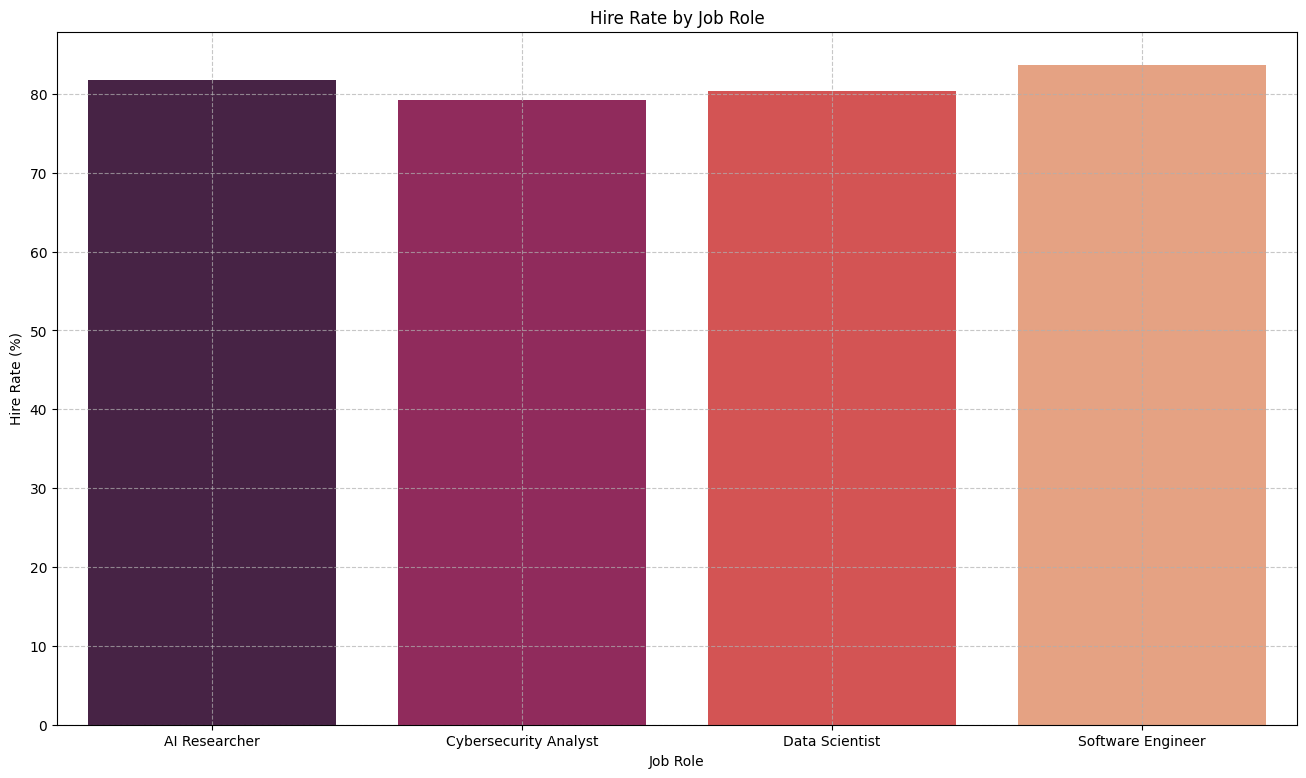

In [193]:
# Using bar plot to see the impact of each feature on hiring decision

def plot_hire_rate(column_name):

    hire_rate = data.groupby(column_name)['Recruiter Decision'].mean() * 100

    plt.figure(figsize=(16, 9))

    sns.barplot(x=hire_rate.index, y=hire_rate.values, palette="rocket")
    plt.xlabel(column_name)
    plt.ylabel('Hire Rate (%)')
    plt.title(f'Hire Rate by {column_name}')
    plt.grid(linestyle='--', alpha=0.7)
    plt.show()

plot_hire_rate('Job Role')
# plot_hire_rate('')

<ipython-input-194-8abbeb1127f7>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data['Recruiter Decision'] == 1][var], label="Hire", shade=True)
<ipython-input-194-8abbeb1127f7>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data['Recruiter Decision'] == 0][var], label="Reject", shade=True)
<ipython-input-194-8abbeb1127f7>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data['Recruiter Decision'] == 1][var], label="Hire", shade=True)
<ipython-input-194-8abbeb1127f7>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; plea

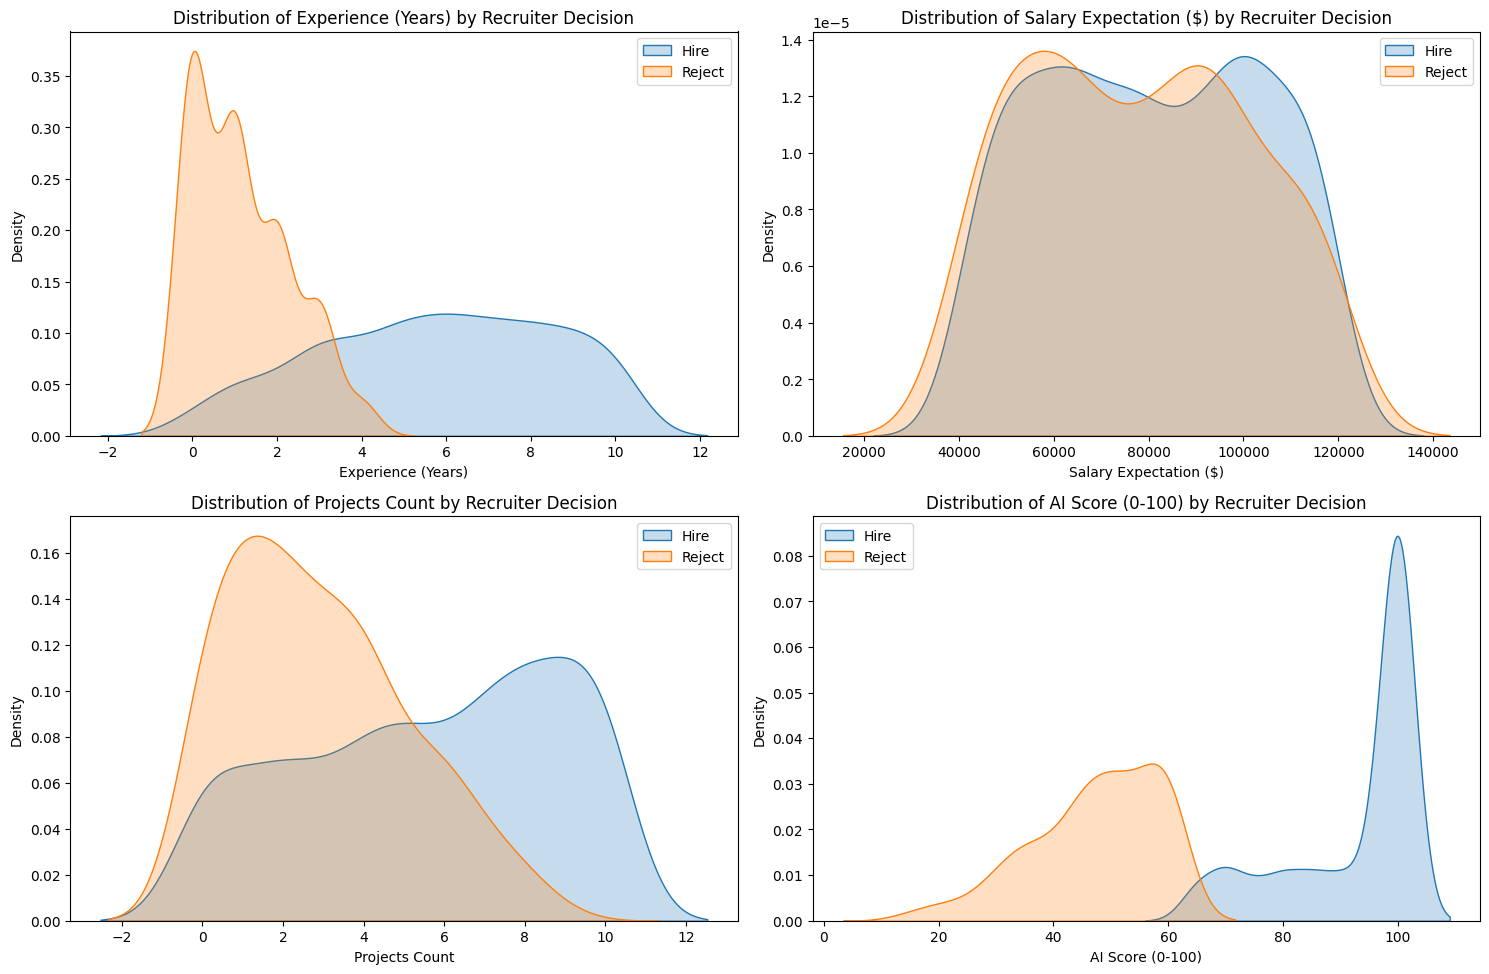

In [194]:
quantitative_vars = ['Experience (Years)', 'Salary Expectation ($)', 'Projects Count', 'AI Score (0-100)']

plt.figure(figsize=(15, 10))
for i, var in enumerate(quantitative_vars, 1):
    plt.subplot(2, 2, i)
    sns.kdeplot(data[data['Recruiter Decision'] == 1][var], label="Hire", shade=True)
    sns.kdeplot(data[data['Recruiter Decision'] == 0][var], label="Reject", shade=True)
    plt.title(f'Distribution of {var} by Recruiter Decision')
    plt.legend()

plt.tight_layout()
plt.show()

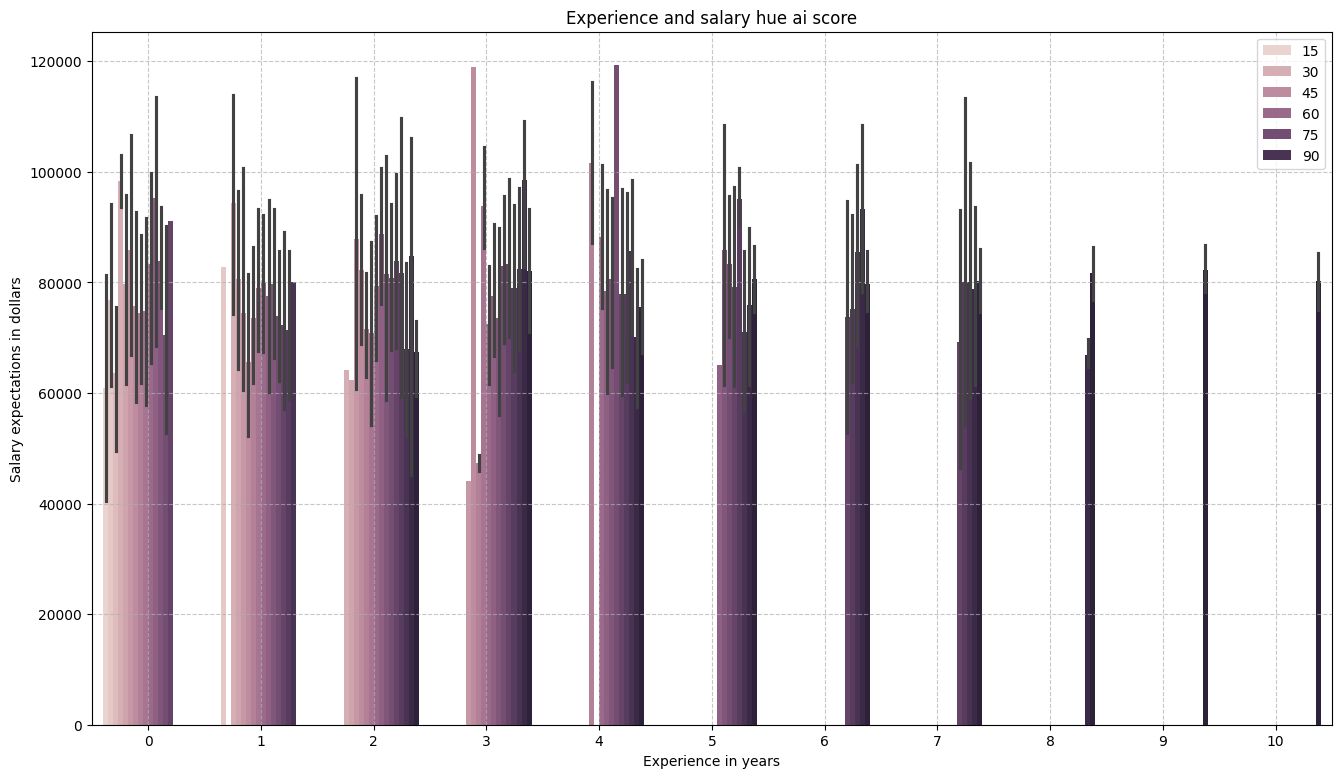

In [89]:
# Check how experience relate on salary and how ai is rate the candidats

plt.figure(figsize=(16, 9))

sns.barplot(data=data, x='Experience (Years)', y='Salary Expectation ($)', hue='AI Score (0-100)')
plt.title('Experience and salary hue ai score')
plt.xlabel('Experience in years')
plt.ylabel('Salary expectations in dollars')
plt.legend(loc='upper right')
plt.grid(linestyle='--', alpha=0.7)
plt.show()

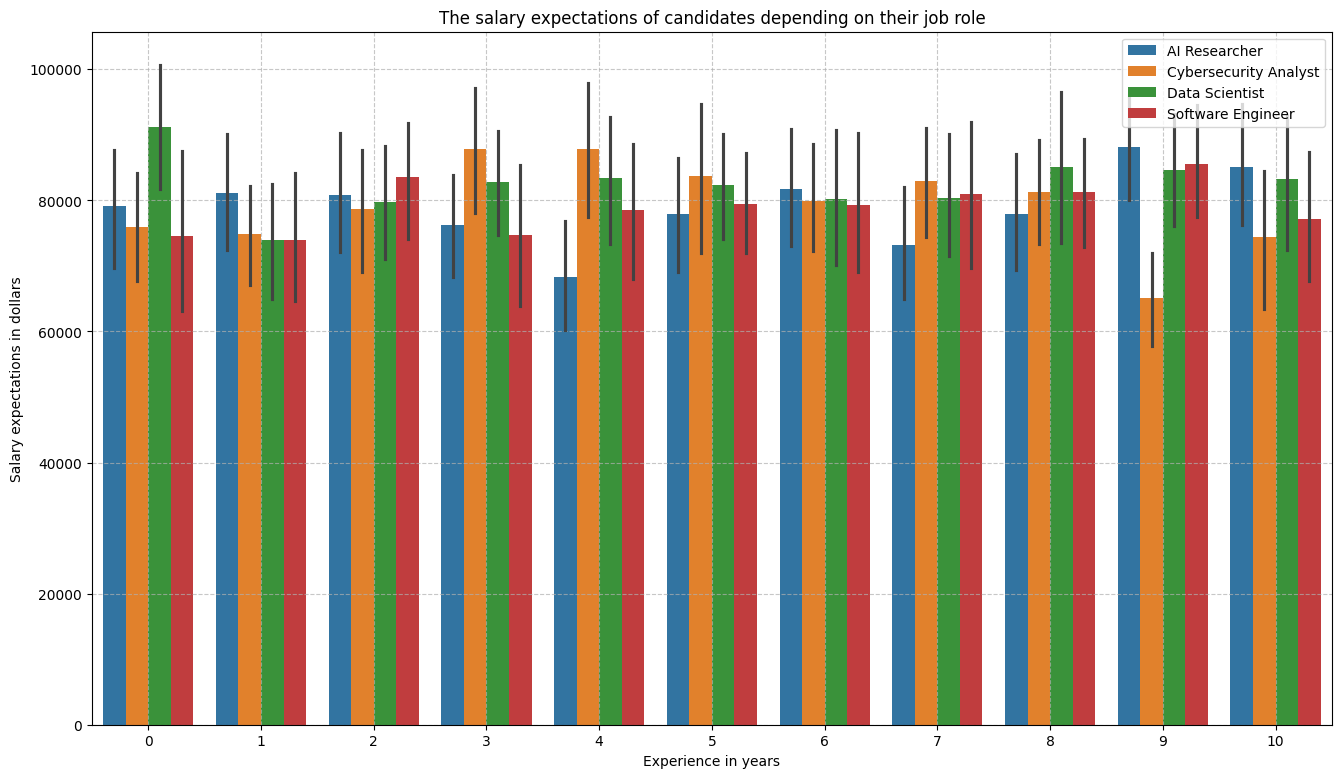

In [41]:
# Check the salary expectations of candidates depending on their job role

plt.figure(figsize=(16, 9))

sns.barplot(data=data, x='Experience (Years)', y='Salary Expectation ($)', hue='Job Role')
plt.title('The salary expectations of candidates depending on their job role')
plt.xlabel('Experience in years')
plt.ylabel('Salary expectations in dollars')
plt.legend(loc='upper right')
plt.grid(linestyle='--', alpha=0.7)
plt.show()

<ipython-input-44-4294e60be05d>:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper right')


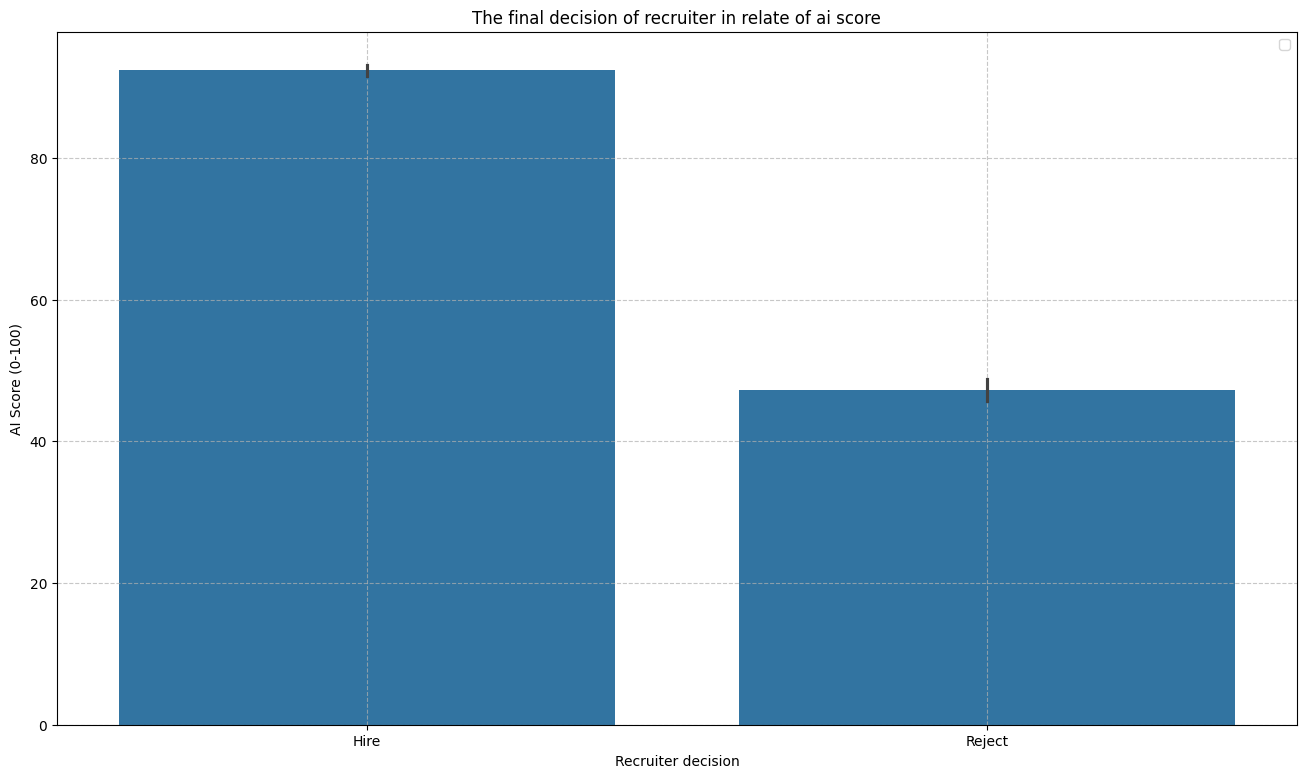

In [44]:
# Now check the final decision of recruiter in relate of ai score

plt.figure(figsize=(16, 9))

sns.barplot(data=data, x='Recruiter Decision', y='AI Score (0-100)')
plt.title('The final decision of recruiter in relate of ai score')
plt.xlabel('Recruiter decision')
plt.ylabel('AI Score (0-100)')
plt.grid(linestyle='--', alpha=0.7)
plt.show()

In [163]:
# Encode the labels

le = LabelEncoder()

for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = le.fit_transform(data[column])


In [164]:
data.head()

,Resume_ID,Experience (Years),Education,Certifications,Job Role,Recruiter Decision,Salary Expectation ($),Projects Count,AI Score (0-100)
0,1,10,0,3,0,1,104895,8,100
1,2,10,3,2,2,1,113002,1,100
2,3,1,3,1,1,1,71766,7,70
3,4,7,1,0,0,1,46848,0,95
4,5,4,4,3,3,1,87441,9,100


In [173]:
# Modelling

X = data.drop(columns=['Recruiter Decision'])

y = data['Recruiter Decision']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.3, random_state=42)

model = GaussianNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [174]:
accuracy = accuracy_score(y_test, y_pred)
print("Model accuracy:", accuracy)

print("\nClassification report:")
print(classification_report(y_test, y_pred))

Model accuracy: 0.9528571428571428

Classification report:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89       131
           1       1.00      0.94      0.97       569

    accuracy                           0.95       700
   macro avg       0.90      0.97      0.93       700
weighted avg       0.96      0.95      0.95       700



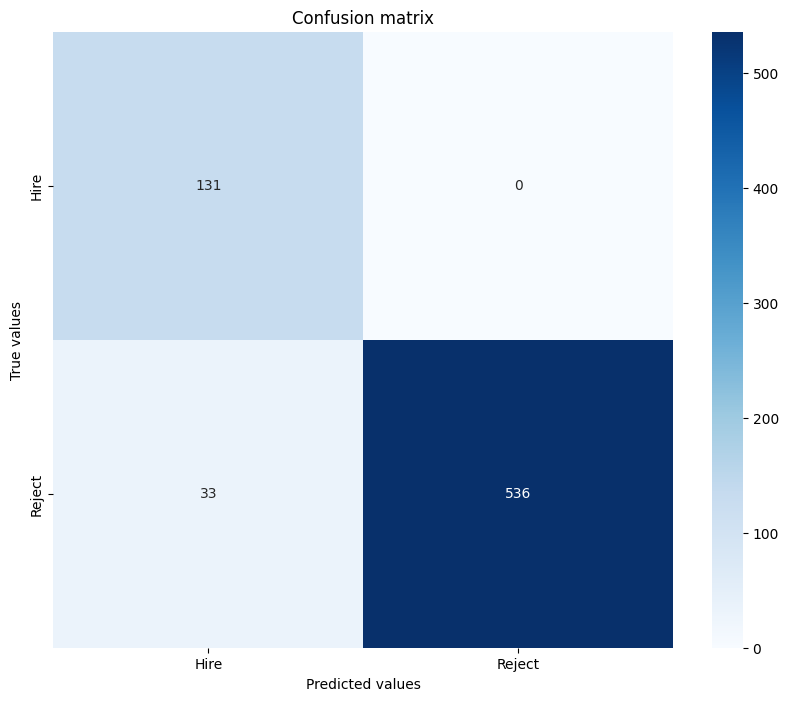

In [176]:
# Confusion matrix visualization

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Hire', 'Reject'], yticklabels=['Hire', 'Reject'])
plt.xlabel('Predicted values')
plt.ylabel('True values')
plt.title('Confusion matrix')
plt.show()